Archive:  /content/project_data.zip
  inflating: test/kannada.csv        
  inflating: test/malayalam.csv      
  inflating: test/tamil.csv          
  inflating: train/kannada.csv       
  inflating: train/malayalam.csv     
  inflating: train/tamil.csv         
Archive:  /content/stopwords.zip
  inflating: stopwords/kannada.txt   
  inflating: stopwords/malayalam.txt  
  inflating: stopwords/tamil.txt     


In [1]:
def seperate_labels(df, lang):
    labels = []

    def get_label(line):
        if '\t' in line:
            temp = line.split('\t')
            sentence, label = temp[0], temp[1]
            if label.lower() == 'not-' + lang:
                return None
            labels.append(label)
            return sentence
        return None

    df['sentence'] = df['sentence'].apply(get_label)
    df.dropna(inplace=True)

    df['labels'] = labels

    return df

In [3]:
import pandas as pd
import numpy as np
import os

languages = ['tamil', 'malayalam', 'kannada']

def getData(path):

    DFs = {}

    for lang in languages:
        df = pd.read_csv(path + lang + '.csv', on_bad_lines='skip', names=['sentence'])
        df = seperate_labels(df, lang)
        DFs.update({lang: df})
    return DFs

train_dfs = getData('Datasets/Contents/train/')
test_dfs = getData('Datasets/Contents/test/')

test_dfs['malayalam']

,sentence,labels
0,അപ്പൊ ഇതൊരൊന്നൊരാ മൊതലാണല്ലേ Suraj ആണ് നടൻ ന്...,Not_offensive
1,എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി vivo vid...,Not_offensive
2,Fefka ee padam release cheyyan samadhicho?,Not_offensive
3,അആഹാ.. സംഗീതം ജെക്‌സ് ബിജോയ് ആണ് അപ്പൊ പൊട്ടലു...,Not_offensive
4,Ravile thane views likes ethra ayyi enn nokan ...,Not_offensive
...,...,...
1996,Swargatthil ninnu purathaakkappetta daivatthin...,Not_offensive
1997,Ivide Palakkad Jayettan Fans club nnu ashamsak...,Not_offensive
1998,ഈ പടത്തിന് വെയിറ്റ് ചെയ്യുന്ന മമ്മൂക്ക ഫാൻസും,Not_offensive
1999,കട്ട ലാലേട്ടൻ ഫാൻസ് ഒരു ലൈക് തന്നിട്ട് പോവാമോ ...,Not_offensive


In [4]:
test_dfs['tamil']

,sentence,labels
0,14.12.2018 epo trailer pathutu irken ... Semay...,Not_offensive
1,Paka thana poro movie la Enna irukunu,Not_offensive
3,Suriya anna vera level anna mass,Not_offensive
4,suma kaththaatha da sound over a pooda kudaath...,Offensive_Untargetede
5,ஆனவக் கொலைகள் நடக்காவிடில் ...நம் அடையாளம் அளி...,Offensive_Targeted_Insult_Group
...,...,...
4069,Sk production /Niya naana lan vrdhu .....rytu....,Not_offensive
4070,Vijay going to next level thalaivaaaaa,Not_offensive
4071,மண்ணு பொண்ணு ரெண்டுமே ஒன்னு அதுல எவன் கைய வச்ச...,Offensive_Targeted_Insult_Group
4073,asuran= aadukalam+pudupettai+ wada chennai..ye...,Not_offensive


In [5]:
test_dfs['kannada']

,sentence,labels
0,ಜೈ ಮೋರಿ ಜೈ ರೋಗಿ ಇಸ್ಲಾಂ ಸಾಯಿಸಿ ಇದೆ ಇವರ ಗುರಿ,Offensive_Targeted_Insult_Group
1,Anna nim e vedio nodinu mathe chaina apps use ...,Offensive_Targeted_Insult_Group
2,Super anna yenu thappila yela sari agi hellidi...,Not_offensive
5,Kuladalli keelyavudo huchappa,Offensive_Targeted_Insult_Individual
6,ಶೇಕಡ 100(%) ರಷ್ಟು viruses na China ಉತ್ಪನ್ನ ಮಾಡ...,Offensive_Targeted_Insult_Group
...,...,...
771,ನನಗು ಕನ್ನಡ ಸಾಕು,Offensive_Untargetede
773,Startup start maadalu capacity growth maadalu ...,Not_offensive
774,Rashmika idanna nodi thi*a urkimbeku🤣🤣🤣🤣🤣,Offensive_Targeted_Insult_Individual
776,ನೋಡ್ತಾ ಹೋದ್ರೆ ಸಾವಿರಾರು lyrical video ಗಳು,Not_offensive


In [6]:
unique_labels = list(train_dfs['tamil']['labels'].unique())
train_dfs['tamil']['labels'] = train_dfs['tamil']['labels'].apply(lambda x: unique_labels.index(x))
test_dfs['tamil']['labels'] = test_dfs['tamil']['labels'].apply(lambda x: unique_labels.index(x))

In [7]:
train_dfs['malayalam']['labels'] = train_dfs['malayalam']['labels'].apply(lambda x: unique_labels.index(x))
test_dfs['malayalam']['labels'] = test_dfs['malayalam']['labels'].apply(lambda x: unique_labels.index(x))

In [8]:
train_dfs['kannada']['labels'] = train_dfs['kannada']['labels'].apply(lambda x: x if x in unique_labels else None)
train_dfs['kannada'].dropna(inplace=True)

train_dfs['kannada']['labels'] = train_dfs['kannada']['labels'].apply(lambda x: unique_labels.index(x))
test_dfs['kannada']['labels'] = test_dfs['kannada']['labels'].apply(lambda x: unique_labels.index(x))

In [9]:
pip install demoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import re
import demoji

def getstopwords(path):
    stopwords = set()

    for lang in languages:
        f = open(path + lang + '.txt', 'r', encoding='cp437')
        stopwords = set(f.read().split('\n')) | stopwords
    return stopwords

stopwords = getstopwords('Datasets/Contents/stopwords/')

print("stopwords :-", stopwords, end='\n\n\n')

def clean(text):

    # Remove digits and punctuations    
    text = re.sub(r'\d+|', '', text)
    text = re.sub(r'\.', '', text)
    text = demoji.replace(text, '')

    # Remove stopwords    
    text = ' '.join([word for word in text.split() if word not in stopwords])
    
    return text

def preprocess(DFs):

    # combine all languages sentence into a single DataFrame
    df = pd.concat([DFs[lang] for lang in languages], ignore_index=True)

    # clean sentences
    df['sentence'] = df['sentence'].apply(clean)

    return df

df = preprocess(train_dfs)
df

stopwords :- {'α┤¬α┤┐α┤¿α╡ìα┤¿α╡åα┤»α╡üα┤éα┤¬α╡ïα┤▓α╡üα┤│α╡ìα┤│', 'α▓çα▓╡α▓░α│ü', 'α▓»α▓╛α▓╡α│üα▓ªα│ç', 'α┤Äα┤¿α╡ìα┤¿α┤ñα╡üα┤òα╡èα┤úα╡ìα┤ƒα╡ì', 'α«çα«░α»ü', 'α«Äα«⌐α«┐α«⌐α»üα««α»ì', 'α«çα«╡α»ê', 'α▓Æα▓éα▓ªα│ç', 'α┤çα┤ñα╡üα┤╡α┤░α╡å', 'α««α»üα«ñα«▓α»ì', 'α«╡α«░α»ê', 'α┤àα┤ñα┤┐α┤¿α┤╛α╡╜', 'α▓ñα▓«α│ìα▓«', 'α▓«α▓ñα│ìα▓ñα│èα▓éα▓ªα│ü', 'α┤Äα┤¿α╡ìα┤¿α┤ñα┤┐α┤¿α╡ü', 'α▓àα▓╡α│üα▓ùα▓│', 'α▓çα▓ñα│ìα▓»α▓╛α▓ªα▓┐', 'α▓àα▓éα▓ªα▓░α│å', 'α▓çα▓¿α│ìα▓¿α│é', 'α▓░α▓┐α▓éα▓ª', 'α▓åα▓ªα▓░α│å', 'α▓╣α│åα▓Üα│ìα▓Üα▓┐α▓¿', 'α«àα«ñα«⌐α»ì', 'α┤àα┤ñα╡üα┤òα╡èα┤úα╡ìα┤ƒα┤╛α┤úα╡ì', 'α┤àα┤ñα┤┐α┤¿α┤┐α┤ƒα╡å', 'α«çα«ƒα«ñα»ìα«ñα«┐α«▓α»ì', 'α▓╕α│üα▓«α▓╛α▓░α│ü', 'α┤òα╡éα┤ƒα╡üα┤ñα┤▓α┤╛α┤»α┤┐', 'α«àα«ñα«┐α«▓α»ì', 'α«ôα«░α»ì', 'α«¬α«▒α»ìα«▒α«┐', 'α▓¬α│ìα▓░α▓«α│üα▓û', 'α▓ùα│å', 'α▓Ä', 'α«╡α»çα«▒α»ü', 'α«àα«╡α«░α»ì', 'α«àα«Öα»ìα«òα»ç', 'α▓»', 'α«Äα«⌐α»ìα«⌐', 'α▓╣α│Çα▓ùα│å', 'α▓«α▓╛α▓ñα│ìα▓░', 'α▓àα▓╡α▓░α▓┐α▓ùα│å', 'α«Äα«⌐α»ìα«¬α«ñα»ê', 'α▓Åα▓òα│åα▓éα▓ªα▓░α│å', 'α▓«α│éα▓▓α▓ò', 'α▓╣α▓▓α▓╡α▓╛α▓░α│ü', 'α▓êα▓ù', 'α▓àα▓ªα▓░α▓▓α│ìα▓▓α▓┐', 'α

,sentence,labels
0,movie vara level la Erika poguthu,0
1,Padam nalla comedy padama irukum polaye,0
2,karthick subburaj anne intha padam vetri adaya...,0
3,கவுண்டர் தேவர்சார்பாக வெற்றி பெற வாழ்த்துக்கள்,0
4,ippo intha trailer ah parkuravana oru like pod...,0
...,...,...
50379,@Gajendra hv neen en maadirodu mele,4
50380,Sir neev adthidda game yavdu,0
50381,Dubb Full movie in telugu,0
50382,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...,0


In [12]:
sentences = df['sentence'].tolist()
labels = df['labels'].tolist()

In [13]:
# to find unique words in the whole corpus
def unique_words(sentences):
    words = list(set(' '.join(sentence for sentence in sentences).split()))
    print(f'no of unique words = {len(words)}')
    return words

In [14]:
vocabulary = unique_words(sentences)

labels_count = len(set(labels))
labels_count

no of unique words = 110736


5

In [15]:
dict(df['labels'].value_counts())

{0: 41263, 3: 3069, 4: 2861, 2: 2665, 1: 526}

In [16]:
from collections import defaultdict

index = defaultdict(int)
for i in range(len(vocabulary)):
    index[vocabulary[i]] = i

def frequency(sentences):
    d = defaultdict(int)
    for word in ' '.join(sentence for sentence in sentences).split():
        d[word] += 1
    return d

def frequency_with_label(sentences, labels, labels_count):
    d = defaultdict(list)
    for i in range(len(sentences)):
        for word in list(set(sentences[i].split())):
            if d[word] == []:
                d[word] = [0 for i in range(labels_count)]
            d[word] = [d[word][j] + (1 if labels[i] == j else 0) for j in range(labels_count)]
    return d

In [17]:
import math

def fuzzy_values(df, words):
    sentences = df['sentence']
    labels = df['labels']
    fuzzy_values = []
    total_words = sum([len(sentence.split()) for sentence in sentences])
    total_sentences = len(sentences)
    each_label_count = dict(df['labels'].value_counts())

    prior_prob = [each_label_count[i]/total_sentences for i in range(labels_count)]

    word_frequency = frequency(sentences)
    word_frequency_with_label = frequency_with_label(sentences, labels, labels_count)

    for t in range(len(words)):
        ut_for_xt = []
        pxt = word_frequency[words[t]] / total_words

        for label in range(labels_count):
            qxt = word_frequency_with_label[words[t]][label] / total_sentences
            KtU = 0 if qxt == 0 else -pxt*(math.log(qxt, 10))

            pxt_label = qxt
            qxt_label = qxt / prior_prob[label]

            KLtU = -pxt_label * (0 if qxt_label == 0 else math.log(qxt_label, 10))

            KLt_xt = KtU - KLtU

            ut_for_xt.append(KLt_xt)
        fuzzy_values.append(ut_for_xt)

    return fuzzy_values

In [18]:
fuzzy_values = fuzzy_values(df, vocabulary) # fuzzy values => weights for each word for every label

In [19]:
fuzzy_values

[[-8.169997089782106e-05, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, -5.869578420994321e-05],
 [-8.169997089782106e-05, 0.0, 0.0, 0.0, 0.0],
 [-8.169997089782106e-05, 0.0, 0.0, 0.0, 0.0],
 [-8.169997089782106e-05, 0.0, 0.0, 0.0, 0.0],
 [-0.0004588250226340699, 0.0, 0.0, 0.0, 0.0],
 [-0.0001527190498314104, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, -5.930071892387144e-05, 0.0],
 [-8.169997089782106e-05, 0.0, 0.0, 0.0, 0.0],
 [-8.169997089782106e-05, 0.0, 0.0, 0.0, 0.0],
 [-8.169997089782106e-05, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, -5.930071892387144e-05, 0.0],
 [0.0, 0.0, 0.0, -5.930071892387144e-05, 0.0],
 [-0.0008051936421491627, 0.0, 0.0, 0.0, 0.0],
 [-0.0003380642234456708, 0.0, 0.0, 0.0, -9.157293203722647e-06],
 [-0.0003991025709035029, 0.0, 0.0, 1.4547028359322928e-07, 0.0],
 [-8.169997089782106e-05, 0.0, 0.0, 0.0, 0.0],
 [-0.00028407631573435736, 0.0, 0.0, 0.0, 0.0],
 [-8.169997089782106e-05, 0.0, 0.0, 0.0, 0.0],
 [-8.169997089782106e-05, 0.0, 0.0, 0.0, 0.0],
 [-8.169997089782106e

In [20]:
norm = [[1000,-1000] for i in range(labels_count)]
for i in range(len(fuzzy_values)):
    for j in range(labels_count):
        norm[j][0] = min(norm[j][0], fuzzy_values[i][j])
        norm[j][1] = max(norm[j][1], fuzzy_values[i][j])
print(norm)

# normalization
for i in range(len(fuzzy_values)):
    for j in range(labels_count):
        fuzzy_values[i][j] = (fuzzy_values[i][j] - norm[j][0]) / (norm[j][1] - norm[j][0])

fuzzy_values

[[-0.06937774038769766, 0.0015966635441925885], [-0.00010774798075415809, 0.030120731442571727], [-0.0006695927780594889, 0.02309901191280997], [-0.0021789078002996307, 0.01952276756961953], [-0.0018833950681948393, 0.0216475266371028]]


[[0.9763525521580845,
  0.003564452556320583,
  0.028171311979314807,
  0.10040274601655086,
  0.08003915408765398],
 [0.977503670961086,
  0.003564452556320583,
  0.028171311979314807,
  0.10040274601655086,
  0.07754474333124367],
 [0.9763525521580845,
  0.003564452556320583,
  0.028171311979314807,
  0.10040274601655086,
  0.08003915408765398],
 [0.9763525521580845,
  0.003564452556320583,
  0.028171311979314807,
  0.10040274601655086,
  0.08003915408765398],
 [0.9763525521580845,
  0.003564452556320583,
  0.028171311979314807,
  0.10040274601655086,
  0.08003915408765398],
 [0.9710390161388437,
  0.003564452556320583,
  0.028171311979314807,
  0.10040274601655086,
  0.08003915408765398],
 [0.9753519227057859,
  0.003564452556320583,
  0.028171311979314807,
  0.10040274601655086,
  0.08003915408765398],
 [0.977503670961086,
  0.003564452556320583,
  0.028171311979314807,
  0.0976702049609387,
  0.08003915408765398],
 [0.9763525521580845,
  0.003564452556320583,
  0.02817131197931480

In [21]:
maxsenlen = max([len(sen.split()) for sen in sentences])
def features(sentences):
    features = []
    for sen in sentences:
        sen_fuzzy = []
        for word in sen.split():
            sen_fuzzy.append(fuzzy_values[index[word]])
        for i in range(maxsenlen - min(maxsenlen, len(sen_fuzzy))):
            sen_fuzzy.append([0 for i in range(labels_count)])
        features.append(sen_fuzzy)
    return np.array(features)

In [22]:
pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/bd/7e/52676c85bab788e0cb87b58e11ab53ba08e590c0db30642dd3222b702c73/scikit_learn-1.4.0-1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 640.0 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.6 MB 1.4 MB/s eta 0:00:08
    --------------------------------------- 0.2/10.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/10.6 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.6 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.6 MB 1.7 MB/s eta 0:00:06
   - -----------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, train_size=0.8)

In [24]:
X_train = features(x_train)
X_test = features(x_test)

In [25]:
X_train.shape

(40307, 186, 5)

In [26]:
X_train = np.reshape(X_train, newshape=(X_train.shape[0],-1))
X_test = np.reshape(X_test, newshape=(X_test.shape[0],-1))
X_test.shape

(10077, 930)

In [27]:
# convert sentiments to catogorical vectors

def categorical(y):
    ans = [[0 for j in range(labels_count)] for i in range(len(y))]
    j =  0
    for i in y:
        ans[j][i] = 1
        j += 1
    return np.array(ans)

Y_train = categorical(y_train)
Y_test = categorical(y_test)

In [28]:
Y_test.shape

(10077, 5)

In [29]:
pip install --upgrade tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/7c/3c/049400232ee2897d613db9009e42269417166c3f8519d46e5c97b6f9e206/tensorflow-2.15.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/da/1b/63e20bde0db52c3be7e078b50cf507f4534ad6e47b5e2b01d9ed63bb652f/tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/25/5e/2e29933bd1dd67c76b56dd37f5950e6a0cf86ce67e9a9eb6761dac8


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import tensorflow as tf

# Initializing the ANN
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=(X_train.shape[1],)))
# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
# Add the output layer
ann.add(tf.keras.layers.Dense(units=labels_count, activation='sigmoid'))

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(ann,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [32]:
ann.compile(optimizer = 'adam', loss = tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])
history = ann.fit(X_train, Y_train, batch_size = 32, epochs = 50, validation_data=(X_test, Y_test))

Epoch 1/50


1260/1260 [==============================] - 5s 3ms/step - loss: 0.2478 - accuracy: 0.8187 - val_loss: 0.2280 - val_accuracy: 0.8190
Epoch 2/50
1260/1260 [==============================] - 3s 3ms/step - loss: 0.2253 - accuracy: 0.8190 - val_loss: 0.2233 - val_accuracy: 0.8190
Epoch 3/50
1260/1260 [==============================] - 3s 3ms/step - loss: 0.2202 - accuracy: 0.8190 - val_loss: 0.2178 - val_accuracy: 0.8190
Epoch 4/50
1260/1260 [==============================] - 3s 3ms/step - loss: 0.2145 - accuracy: 0.8190 - val_loss: 0.2130 - val_accuracy: 0.8190
Epoch 5/50
1260/1260 [==============================] - 4s 3ms/step - loss: 0.2094 - accuracy: 0.8190 - val_loss: 0.2121 - val_accuracy: 0.8190
Epoch 6/50
1260/1260 [==============================] - 4s 3ms/step - loss: 0.2067 - accuracy: 0.8190 - val_loss: 0.2088 - val_accuracy: 0.8190
Epoch 7/50
1260/1260 [==============================] - 4s 3ms/step - loss: 0.2051 - accuracy: 0.8190 - val_loss: 0.2077 - val_accurac

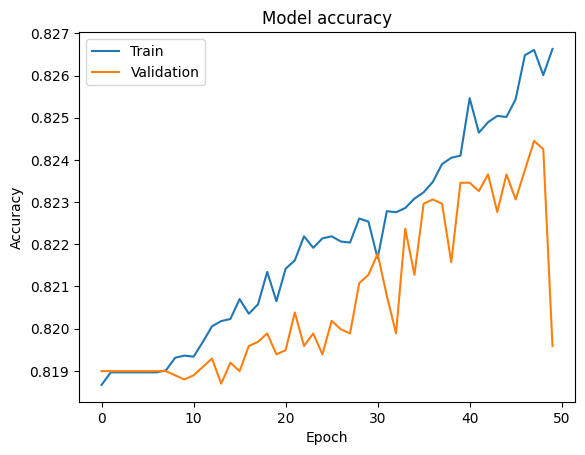

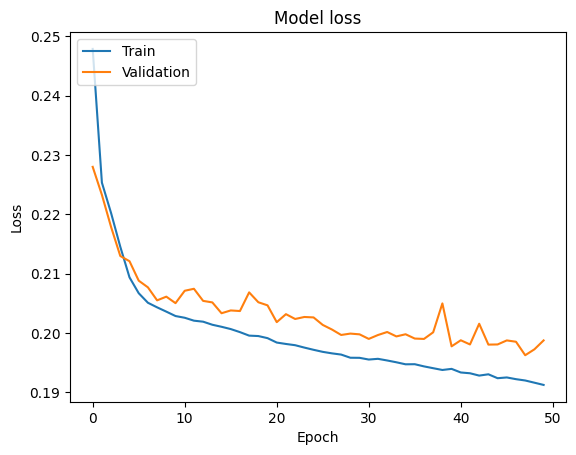

In [33]:
from matplotlib import pyplot as plt

# plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
# prediction

# X_test_features = []

# for sen in x_test:
#     test_sen_fuzzy = []
#     for word in sen:
#         if index[word] > 0:
#             test_sen_fuzzy.append(fuzzy_values[index[word]-1])
#     if len(test_sen_fuzzy) < maxsenlen:
#         for i in range(maxsenlen-len(test_sen_fuzzy)):
#             test_sen_fuzzy.append([0 for j in range(labels_count)])
#     else:
#         test_sen_fuzzy = test_sen_fuzzy[:maxsenlen]
#     X_test_features.append(test_sen_fuzzy)

# X_test_features = np.array(X_test_features)
# X_test = np.reshape(X_test_features, newshape=(-1,129,))

predict = ann.predict(X_test, batch_size=50, verbose=1)
y_pred = np.array(predict)
y_pred

202/202 [==============================] - 0s 1ms/step


array([[0.58043724, 0.02091819, 0.10206414, 0.1224765 , 0.10700636],
       [0.87693375, 0.00965356, 0.05088584, 0.02793295, 0.03952358],
       [0.805261  , 0.01520741, 0.16038913, 0.00510631, 0.05573769],
       ...,
       [0.984508  , 0.00213256, 0.00384707, 0.00488756, 0.00835884],
       [0.9500486 , 0.00292223, 0.00735746, 0.01419283, 0.01186294],
       [0.90947247, 0.0069948 , 0.01841664, 0.03548741, 0.02598801]],
      dtype=float32)

In [35]:
def getlabels(y_pred):
    pred_labels = []
    for pred in y_pred:
        temp = list(pred)
        pred_labels.append(temp.index(max(temp)))
    return pred_labels

Y_test_labels = getlabels(Y_test)
Y_pred_labels = getlabels(y_pred)    

In [36]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(Y_test_labels, Y_pred_labels)
print("Accuracy = {:2f}".format(accuracy * 100))

Accuracy = 81.958916


In [37]:
y_true, y_pred = Y_test_labels, Y_pred_labels

In [39]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/2d/46/cf3fce41ffc543b6e94dadbe6b647559d591df446ec716e72c3b4ce71b34/seaborn-0.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.8 kB 991.0 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.8 kB 1.4 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.8 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


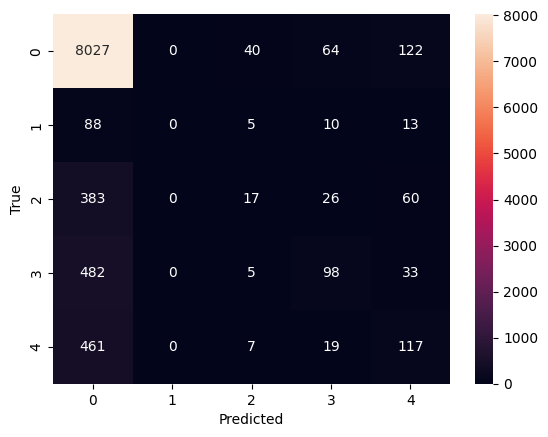

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


c:\Users\MI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


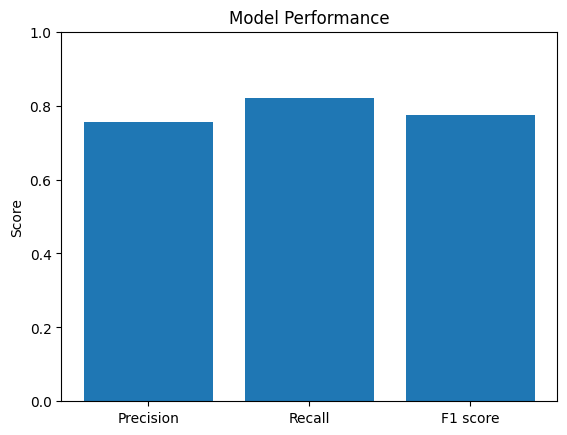

In [41]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Create a bar plot
fig, ax = plt.subplots()
ax.bar(['Precision', 'Recall', 'F1 score'], [precision, recall, f1_score])
ax.set_ylim([0, 1])
ax.set_ylabel('Score')
ax.set_title('Model Performance')
plt.show()


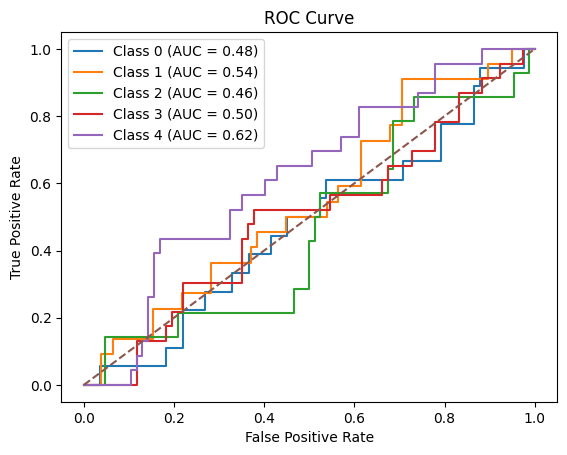

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Generate random multiclass labels
num_classes = 5
y_true = y_true
y_score = y_pred
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true == i, y_score[:, i])

# Plot ROC curve for each class
fig, ax = plt.subplots()
for i in range(num_classes):
    ax.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))
ax.plot([0, 1], [0, 1], linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
plt.show()


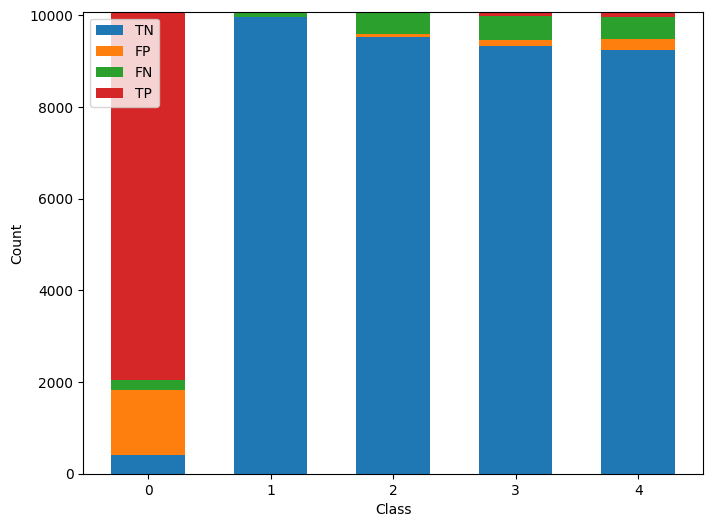

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

n_classes = 5

# Compute the confusion matrix and the TN, FP, FN, and TP for each class
cm = confusion_matrix(y_true, y_pred, labels=list(range(n_classes)))
tn = []
fp = []
fn = []
tp = []
for i in range(n_classes):
    tn_i = np.sum(np.delete(np.delete(cm, i, 0), i, 1))
    fp_i = np.sum(np.delete(cm, i, 0)[:, i])
    fn_i = np.sum(cm[i, :]) - cm[i, i]
    tp_i = cm[i, i]
    tn.append(tn_i)
    fp.append(fp_i)
    fn.append(fn_i)
    tp.append(tp_i)

# Plot the stacked bar chart
labels = list(range(n_classes))
plt.figure(figsize=(8, 6))
plt.bar(labels, tn, width=0.6, label='TN')
plt.bar(labels, fp, width=0.6, bottom=tn, label='FP')
plt.bar(labels, fn, width=0.6, bottom=np.array(tn)+np.array(fp), label='FN')
plt.bar(labels, tp, width=0.6, bottom=np.array(tn)+np.array(fp)+np.array(fn), label='TP')
plt.xticks(labels)
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.show()
